In [1]:
#REGRESSION

In [14]:
#Bibliotèques
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
#Télécharchement du Dataset "diabetes"
data = datasets.load_diabetes()

In [16]:
#Affichage des clés du Dataset
print(data.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [17]:
#Affichage du nombre d'observations
print(data.target.shape)

(442,)


In [18]:
#Affichage des Inputs / Features
print(data.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [19]:
#Utilisation d'une feature uniquement 
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [20]:
#80% TRAINING / 20% TEST
X = data.data
y = data.target
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
print(diabetes_X_train.shape); print(diabetes_X_test.shape)

(353, 10)
(89, 10)


In [21]:
#Division de data en un ensemble Entrainement/Test
diabetes_X_train = diabetes_X[:-89]
diabetes_X_test = diabetes_X[-89:]

In [22]:
#Division de targets en un ensemble Entrainement/Test
diabetes_y_train = diabetes_y[:-89]
diabetes_y_test = diabetes_y[-89:]

In [23]:
#Créetion d'un modèle de régression linéaire avec les paramètres par défaut
regr = MLPRegressor(hidden_layer_sizes=(100,), activation='relu',  solver='adam',
                   alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                   power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, 
                   )

In [24]:
#Entraînement du modèle en utilisant l'ensemble d'Entrainement
regr.fit(diabetes_X_train, diabetes_y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [25]:
#Faire des prédictions en utilisant l'ensemble de test
diabetes_y_pred = regr.predict(diabetes_X_test)

In [26]:
#Métriques
#print("RSS : %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
RSS=mean_squared_error(diabetes_y_test, diabetes_y_pred)*89
print(" RSS = %.2f" % RSS)
print(" RSE = %.2f" % (1-r2_score(diabetes_y_test, diabetes_y_pred)))
print(" R2 (Coefficient de determination) = %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

 RSS = 2288742.59
 RSE = 4.00
 R2 (Coefficient de determination) = -3.00


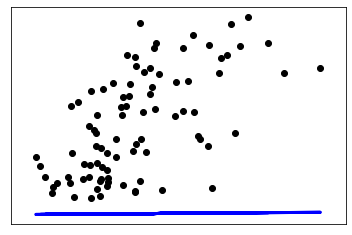

In [27]:
#Droite de regression
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()